In [1]:
import pandas as pd

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import nltk

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
import re

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
df=pd.read_csv('/content/drive/MyDrive/data/Fake_news_Data/train.csv')

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
df.shape

(20800, 5)

In [11]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
df['author']=df['author'].fillna(df['author'].mode()[0])

In [13]:
df.isnull().sum()

id          0
title     558
author      0
text       39
label       0
dtype: int64

In [14]:
x=df['text']

In [15]:
x.isnull().sum()

39

In [16]:
x=x.dropna()

In [17]:
x.isnull().sum()

0

In [18]:
x.shape

(20761,)

In [19]:
x.reset_index(inplace=True,drop=True)

In [21]:
wordnet=WordNetLemmatizer()

In [22]:
ps=PorterStemmer()

In [24]:
corpus=[]
for i in range(len(x)):
  review=re.sub('^a-zA-Z',' ',x[i])
  review=review.lower()
  review=review.split()
  review=[wordnet.lemmatize(word) for word in review if word not in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
corpus[0]

'house dem aide: didn’t even see comey’s letter jason chaffetz tweeted darrell lucus october 30, 2016 subscribe jason chaffetz stump american fork, utah ( image courtesy michael jolley, available creative commons-by license) apology keith olbermann, doubt worst person world week–fbi director james comey. according house democratic aide, look like also know second-worst person well. turn comey sent now-infamous letter announcing fbi looking email may related hillary clinton’s email server, ranking democrat relevant committee didn’t hear comey. found via tweet one republican committee chairmen. know, comey notified republican chairman democratic ranking member house intelligence, judiciary, oversight committee agency reviewing email recently discovered order see contained classified information. long letter went out, oversight committee chairman jason chaffetz set political world ablaze tweet. fbi dir informed me, "the fbi learned existence email appear pertinent investigation." case reo

In [28]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [29]:
X=cv.fit_transform(corpus).toarray()

In [61]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [30]:
X.shape

(20761, 5000)

In [32]:
df.shape

(20800, 5)

In [33]:
data=df.copy()

In [35]:
data=data.dropna(subset=['text'])

In [36]:
data.shape

(20761, 5)

In [38]:
y=data['label']

In [39]:
y.reset_index(drop=True,inplace=True)

In [40]:
y.shape

(20761,)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=3)

In [44]:
mnb=MultinomialNB()

In [45]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [46]:
y_pred=mnb.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
accuracy_score(y_test,y_pred)

0.9046426507416683

In [50]:
confusion_matrix(y_test,y_pred)

array([[2440,  204],
       [ 291, 2256]])

In [52]:
cm=confusion_matrix(y_test,y_pred)

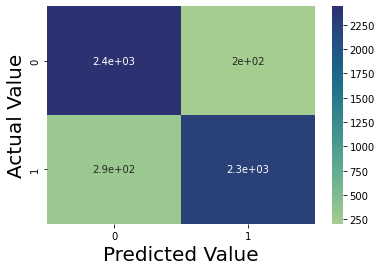

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='crest')
plt.xlabel("Predicted Value",size=(20))
plt.ylabel("Actual Value",size=(20))
plt.show()

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2644
           1       0.92      0.89      0.90      2547

    accuracy                           0.90      5191
   macro avg       0.91      0.90      0.90      5191
weighted avg       0.91      0.90      0.90      5191



In [64]:
### Using Passive Aggressive  Classifier

In [65]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [66]:
pac=PassiveAggressiveClassifier()

In [67]:
pac.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [68]:
y_pac=pac.predict(x_test)

In [69]:
accuracy_score(y_test,y_pac)

0.9348873049508765

In [70]:
confusion_matrix(y_test,y_pac)

array([[2459,  185],
       [ 153, 2394]])

In [71]:
cm=confusion_matrix(y_test,y_pac)

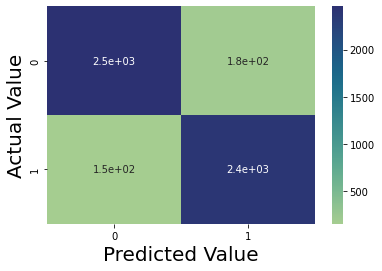

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='crest')
plt.xlabel("Predicted Value",size=(20))
plt.ylabel("Actual Value",size=(20))
plt.show()

In [73]:
print(classification_report(y_test,y_pac))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2644
           1       0.93      0.94      0.93      2547

    accuracy                           0.93      5191
   macro avg       0.93      0.93      0.93      5191
weighted avg       0.93      0.93      0.93      5191

